<h1 style="text-align:center">
    Current and Future Technological Trends
</h1>

## Objectives


In this project you will perform the following:

Analyze the data and obtain valuable insights into current and future technological trends using the latest Stack Overflow Developer Survey dataset. These insights will play a key role in guiding strategic business decisions.

## Prepare environment
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Load the dataset from local disk

import zipfile

# Path to your ZIP file
zip_path = "survey_data.zip"
csv_filename = "survey_data.csv"  # name of the CSV inside the ZIP

# Open the ZIP and read the CSV directly
with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



In [ ]:
db = df.dropna(subset=['DatabaseWantToWorkWith']) 
db.shape

(42558, 114)

In [ ]:
db['DatabaseWantToWorkWith'] = db['DatabaseWantToWorkWith'].str.split(';')
db_exploded = db.explode('DatabaseWantToWorkWith')

/tmp/ipykernel_1907/213521770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['DatabaseWantToWorkWith'] = db['DatabaseWantToWorkWith'].str.split(';')


In [ ]:
top_databases = db_exploded['DatabaseWantToWorkWith'].value_counts().head(5)
top_databases

DatabaseWantToWorkWith
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
Name: count, dtype: int64

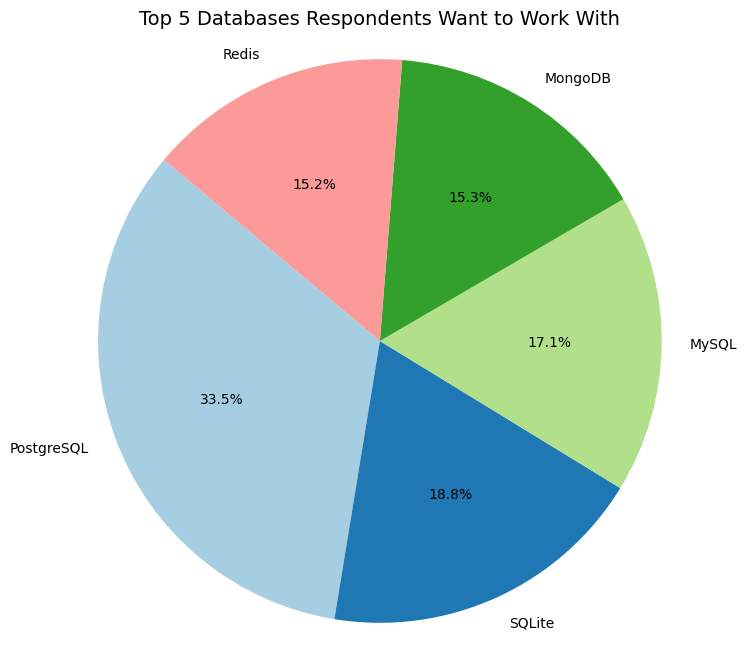

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_databases,
    labels=top_databases.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Databases Respondents Want to Work With', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

In [ ]:
db1 = df.dropna(subset=['DatabaseHaveWorkedWith']) 
db1.shape

(50254, 114)

In [ ]:
db1['DatabaseHaveWorkedWith'] = db1['DatabaseHaveWorkedWith'].str.split(';')
db1_exploded = db1.explode('DatabaseHaveWorkedWith')

C:\Users\borod\AppData\Local\Temp\ipykernel_3632\3503381656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1['DatabaseHaveWorkedWith'] = db1['DatabaseHaveWorkedWith'].str.split(';')


In [ ]:
top_10_databases = db1_exploded['DatabaseHaveWorkedWith'].value_counts().head(10)
top_10_databases

DatabaseHaveWorkedWith
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

In [ ]:
top_10_databases_df = top_10_databases.to_frame(name='Count')
top_10_databases_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_DB.csv")

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



In [ ]:
top_5_dev_types = df['DevType'].value_counts().head(5)
top_5_dev_types

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Name: count, dtype: int64

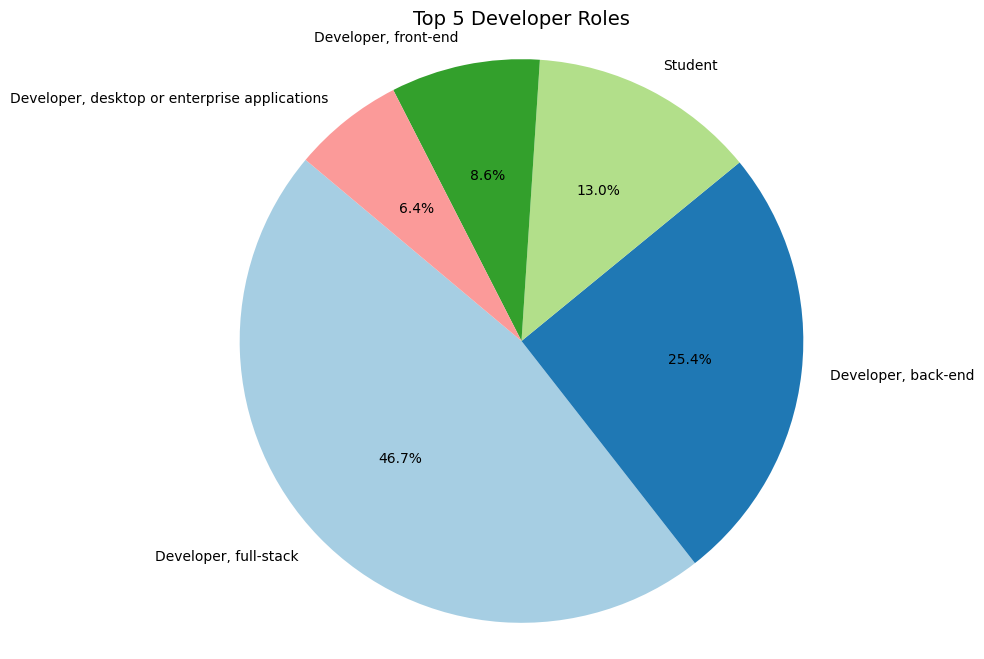

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_5_dev_types,
    labels=top_5_dev_types.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Developer Roles', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [ ]:
df['OpSysProfessional use'] = df['OpSysProfessional use'].str.split(';')
db_exploded = df.explode('OpSysProfessional use')

In [ ]:
df_op_sys = db_exploded['OpSysProfessional use'].value_counts().head(10)
df_op_sys

OpSysProfessional use
Windows                              27918
MacOS                                18625
Ubuntu                               16237
Windows Subsystem for Linux (WSL)     9859
Debian                                5327
Android                               4931
Other Linux-based                     4697
iOS                                   4280
Red Hat                               2858
Arch                                  2521
Name: count, dtype: int64

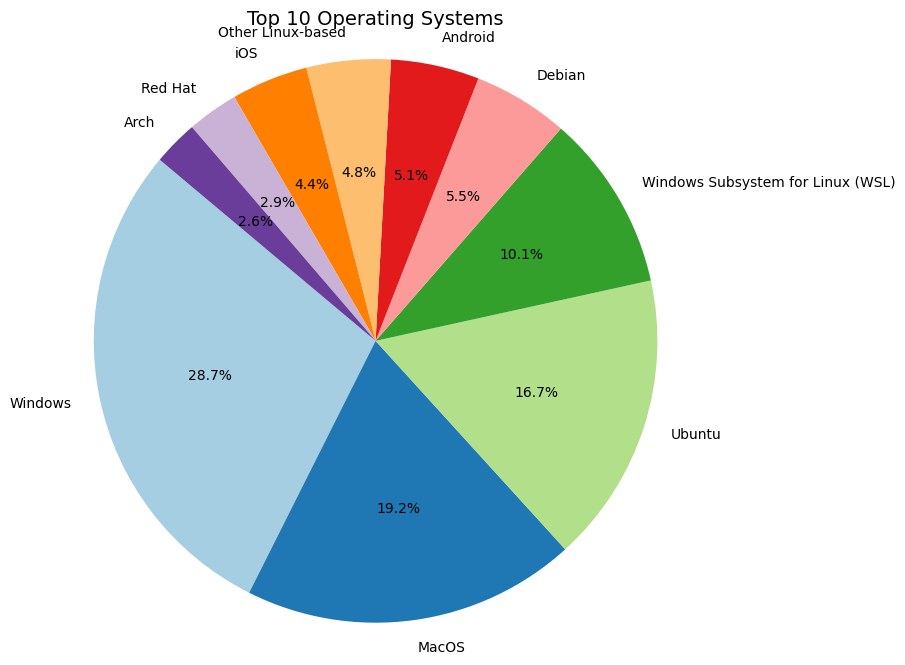

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    df_op_sys,
    labels=df_op_sys.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 10 Operating Systems', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



In [ ]:
lang = df.dropna(subset=['LanguageHaveWorkedWith'])
lang.shape

(59745, 114)

In [ ]:
lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.split(';')
lang_exploded = lang.explode('LanguageHaveWorkedWith')
top_10_lang = lang_exploded['LanguageHaveWorkedWith'].value_counts().head(10)
top_10_lang

C:\Users\borod\AppData\Local\Temp\ipykernel_3632\32777144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang['LanguageHaveWorkedWith'] = lang['LanguageHaveWorkedWith'].str.split(';')


LanguageHaveWorkedWith
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

In [ ]:
top_10_lang_df = top_10_lang.to_frame(name='LanguageCount')


In [ ]:
print(type(top_10_lang_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
top_10_lang_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_lang.csv")

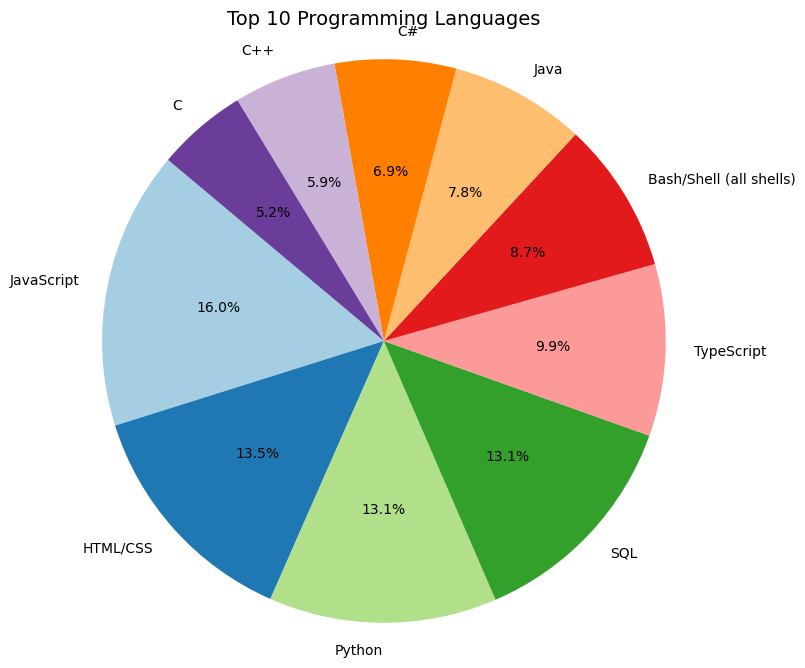

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_10_lang,
    labels= top_10_lang.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 10 Programming Languages', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



In [ ]:
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
tool_exploded = df.explode('NEWCollabToolsHaveWorkedWith')
top_5_tools = tool_exploded['NEWCollabToolsHaveWorkedWith'].value_counts().head(5)
top_5_tools


NEWCollabToolsHaveWorkedWith
Visual Studio Code    42751
Visual Studio         17021
IntelliJ IDEA         15555
Notepad++             13874
Vim                   12523
Name: count, dtype: int64

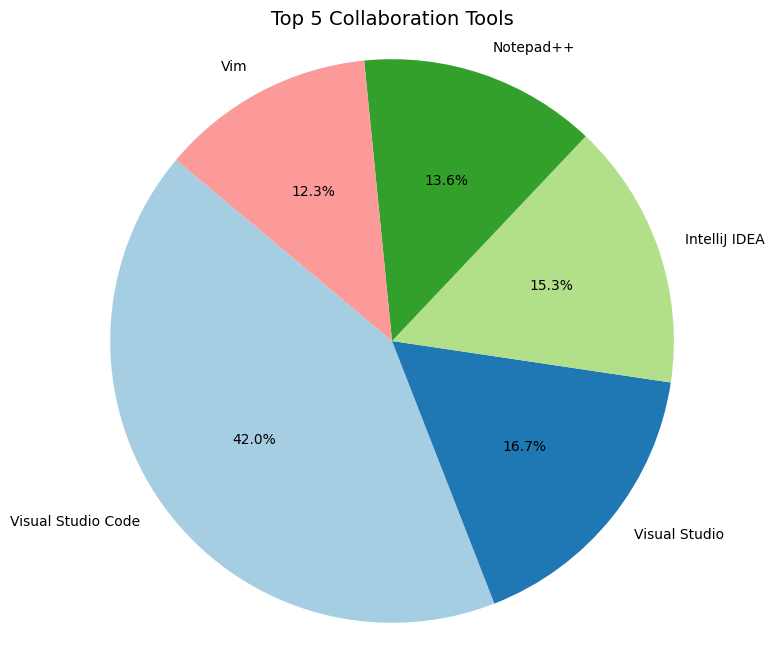

In [ ]:
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a color palette for distinct segments
plt.pie(
    top_5_tools,
    labels=top_5_tools.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Top 5 Collaboration Tools', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



In [ ]:
##Write your code here

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [ ]:
##Write your code here

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [ ]:
##Write your code here

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [ ]:
##Write your code here

Additional

In [ ]:
platf = df.dropna(subset=['PlatformHaveWorkedWith'])
platf.shape

(42366, 114)

In [ ]:
platf['PlatformHaveWorkedWith'] = platf['PlatformHaveWorkedWith'].str.split(';')
platf_exploded = platf.explode('PlatformHaveWorkedWith')
top_10_platf = platf_exploded['PlatformHaveWorkedWith'].value_counts().head(10)
top_10_platf

C:\Users\borod\AppData\Local\Temp\ipykernel_3632\1288410481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platf['PlatformHaveWorkedWith'] = platf['PlatformHaveWorkedWith'].str.split(';')


PlatformHaveWorkedWith
Amazon Web Services (AWS)    22191
Microsoft Azure              12850
Google Cloud                 11605
Cloudflare                    6974
Firebase                      6443
Vercel                        5491
Digital Ocean                 5409
Heroku                        3798
Netlify                       3238
VMware                        3043
Name: count, dtype: int64

In [ ]:
top_10_platf_df = top_10_platf.to_frame(name='Count')
top_10_platf_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_platf.csv")

In [ ]:
web_frame = df.dropna(subset=['WebframeHaveWorkedWith'])
web_frame.shape

(45161, 114)

In [ ]:
web_frame['WebframeHaveWorkedWith'] = web_frame['WebframeHaveWorkedWith'].str.split(';')
web_frame_exploded = web_frame.explode('WebframeHaveWorkedWith')
top_10_web_frame = web_frame_exploded['WebframeHaveWorkedWith'].value_counts().head(10)
top_10_web_frame

C:\Users\borod\AppData\Local\Temp\ipykernel_3632\1659963702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_frame['WebframeHaveWorkedWith'] = web_frame['WebframeHaveWorkedWith'].str.split(';')


WebframeHaveWorkedWith
Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

In [ ]:
top_10_web_frame_df = top_10_web_frame.to_frame(name='Count')
top_10_web_frame_df.to_csv("D:\\My\\Юля\\Data_Analytics_Ex_Files_\\Coursera\\Assignments\\Capstone Project\\Dash1_top_10_web_frame.csv")

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
